In [130]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np
#%matplotlib inline

In [4]:
print(plt)

<module 'matplotlib.pyplot' from '/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>


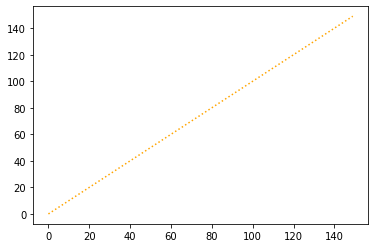

In [31]:
x = list(range(150))
plt.plot(x, c = "orange", ls = ":")
#plot.show needed here to show the chart if NOT in Jupyter Notebook and using %matplotlib inline

Here we'll change the limits of the x and y axis:

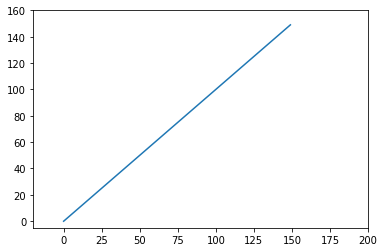

In [10]:
plt.plot(x)
plt.xlim(-20, 200)
plt.ylim(-5, 160)
plt.show()

We can change the color of the line with the c keyword argument to plot like this:

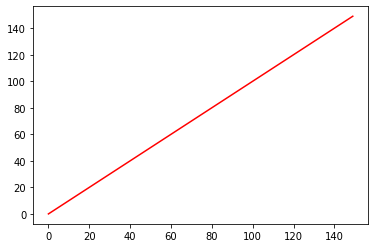

In [11]:
plt.plot(x, c='red')
plt.show()

We can display two series on the same chart by calling .plot multiple times before we call .show.

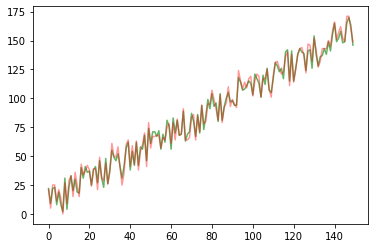

In [33]:
from random import randint

# Some random data
x1 = [randint(-5, 25) + n for n in range(150)]
x2 = [x + randint(-6, 6) for x in x1]
# print(x1)
# print(x2)

# we can use the alpha kwarg to define how transparent the color is
plt.plot(x1, c='green', alpha=0.6)
plt.plot(x2, c='red', alpha=0.4)
plt.show()

Until we call .show, we'll be referring to the same chart, so we can keep adding to it.

### Scatter Charts
Instead of calling .plot, we can call .scatter to create a scatter chart. Unlike .plot, .scatter requires two data series to plot against each other.

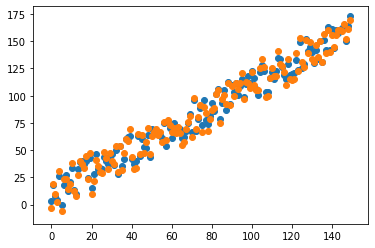

In [13]:
# plotting our random data from the last step
plt.scatter(range(len(x1)), x1)
plt.scatter(range(len(x2)), x2)
plt.show()

We can change the size of the points with the s keyword argument, and, like in previous examples, we can change the color with c.

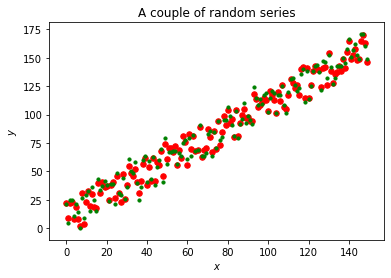

In [36]:
plt.scatter(range(len(x1)), x1, s=30, c='red')
plt.scatter(range(len(x2)), x2, s=10, c='green')
plt.title("A couple of random series")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show() # This is implied in Jupyter Notebook but WILL be needed outside of notebook 
#(like a return that creates a chart)

### Labels, Titles, and Axes
Titles can be added with with the .title method, and axis labels with the .xlabel and .ylabel methods.

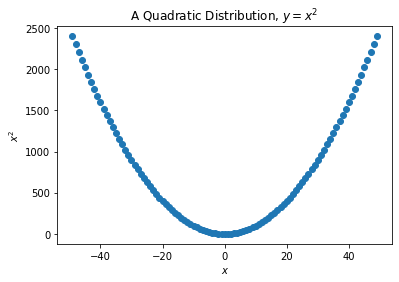

In [15]:
x = list(range(-49, 50))
y = [n ** 2 for n in x]
plt.scatter(x, y)
plt.title('A Quadratic Distribution, $y = x^2$')
plt.xlabel('$x$')
plt.ylabel('$x^2$')
plt.show()

Notice here we include some text inside of dollar signs in the labels. This allows us to write LaTeX math inside of our figures.

### Custom Ticks
We can specify custom ticks with the .xticks and .yticks methods. Both methods require 2 arguments, a list of the indices that the custom ticks will be placed at, and a list of custom ticks.

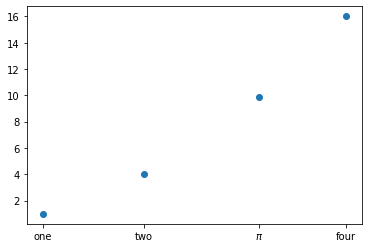

In [16]:
x = [1, 2, 3.14, 4]
y = [n ** 2 for n in x]
plt.scatter(x, y)
plt.xticks([1, 2, 3.14, 4], ['one', 'two', '$\pi$', 'four'])
plt.show()

### Custom Line Types

We can change the type of the line on a line chart with the ls (line style) keyword argument.

    : represents a dotted line
    
    -- represents a dashed line

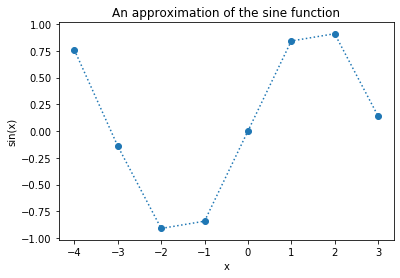

In [18]:
import math

x = range(-4, 4)
y = [math.sin(n) for n in x]
plt.scatter(x, y)
plt.plot(x, y, ls=':')
plt.title('An approximation of the sine function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

### Rotating Text and Annotations

Axis ticks can be rotated with the rotation keyword argument.

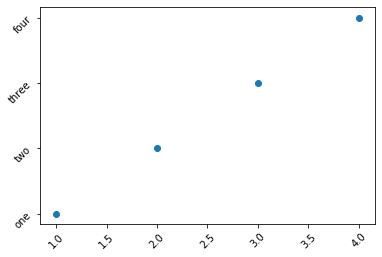

In [19]:
x = range(1, 5)
y = x
plt.scatter(x, y)
plt.yticks([1, 2, 3, 4], ['one', 'two', 'three', 'four'], rotation=45)
plt.xticks(rotation=45)
plt.show()

This can be particularly useful for dates, or visualizing time data.

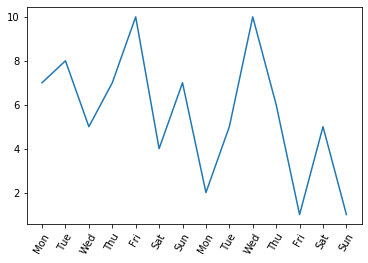

In [20]:
import random

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] * 2

x = range(14)
y = [random.randint(1, 10) for _ in x]
plt.plot(x, y)
plt.xticks(x, weekdays, rotation=60)
plt.show()

### Adding Text

We can use the .text to add arbitrary text to the chart.

We'll need to specify x and y coordinates for where the text should be placed. The coordinates provided specify where the left boundary of the text starts.

We can also specify the color and fontsize keyword arguments to change the presentation of the text.

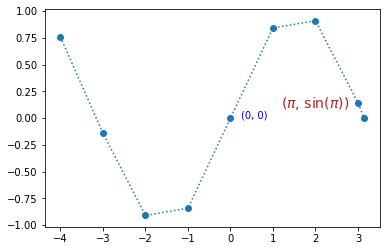

In [21]:
x = list(range(-4, 4))
x.append(3.14159)
y = [math.sin(n) for n in x]

plt.scatter(x, y)      #creates the large plot points to show individual data points
plt.plot(x, y, ls=':') #creates the trend/dotted line

plt.text(0.25, 0, '(0, 0)', fontsize=10, color='blue')
plt.text(1.2, 0.1, '($\pi$, sin($\pi$))', fontsize=14, color='firebrick')
plt.annotate("Origin", xy = 0, )

plt.show()

Annotations can be even more fine-grained with the .annotate method.

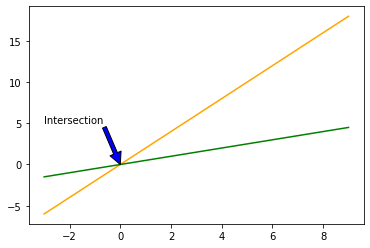

In [22]:
x = range(-3, 10)
y = [n * 2 for n in x]
z = [n / 2 for n in x]

plt.plot(x, y, c='orange')
plt.plot(x, z, c='green')

plt.annotate('Intersection', xy=(0, 0), xytext=(-3, 5),
             arrowprops={'facecolor': 'blue'})

plt.show()

This produces an arrow that points to the point specified with the xy keyword argument, and starts from where the xytext is specified.

### Figure Size and Legends

We can change properties of the figure by accessing the plt.figure method. Keep in mind that we need to specify this before adding to the chart.

We can add a legend to our chart by specifying labels for the series we are plotting then calling the .legend method.

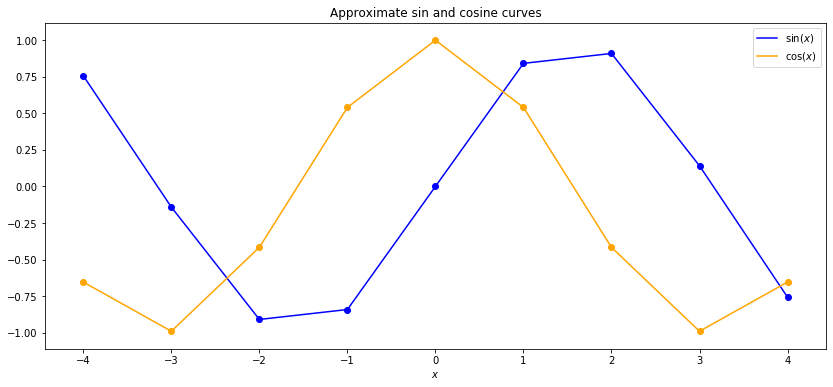

In [38]:
x = range(-4, 5)
sin_x = [math.sin(n) for n in x]
cos_x = [math.cos(n) for n in x]

plt.figure(figsize=(14, 6)) # (width, height)

plt.scatter(x, sin_x, c='blue')
plt.scatter(x, cos_x, c='orange')
plt.plot(x, sin_x, c='blue', label='$\sin(x)$')  #these labels are what the legend reads from
plt.plot(x, cos_x, c='orange', label='$\cos(x)$')

plt.legend(loc='upper right')  
plt.title('Approximate sin and cosine curves')
plt.xlabel('$x$')
plt.savefig("trig_fig")
plt.close

plt.show()

### Subplots

We can create multiple charts together using the .subplots function. We'll need to specify the total number of rows, total number of columns, and which chart is currently the "active" chart.

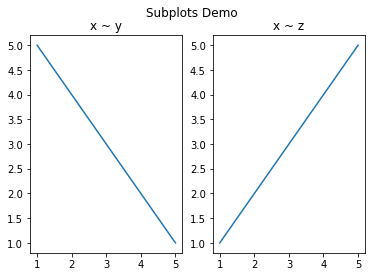

In [39]:
n_rows = 1
n_cols = 2

# some data to play with
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]
z = [1, 2, 3, 4, 5]

# plot the first subplot
plt.subplot(n_rows, n_cols, 1)
plt.plot(x, y)
plt.title('x ~ y')

# the second subplot
plt.subplot(n_rows, n_cols, 2)
plt.plot(x, z)
plt.title('x ~ z')
plt.suptitle("Subplots Demo") #overall title

plt.show()

As an alternative to having the series overlap, we can also plot the series side by side by passing the data series as a tuple to the hist function.

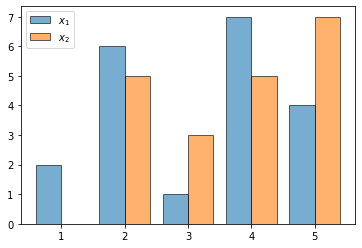

In [41]:
x1 = [randint(1, 5) for _ in range(20)]
x2 = [randint(1, 5) for _ in range(20)]

plt.hist((x1, x2), bins=[1, 2, 3, 4, 5, 6], align='left', edgecolor='black', alpha=0.6, label=['$x_1$', '$x_2$'])

plt.legend()
plt.show()

Let's take a look at one more example:

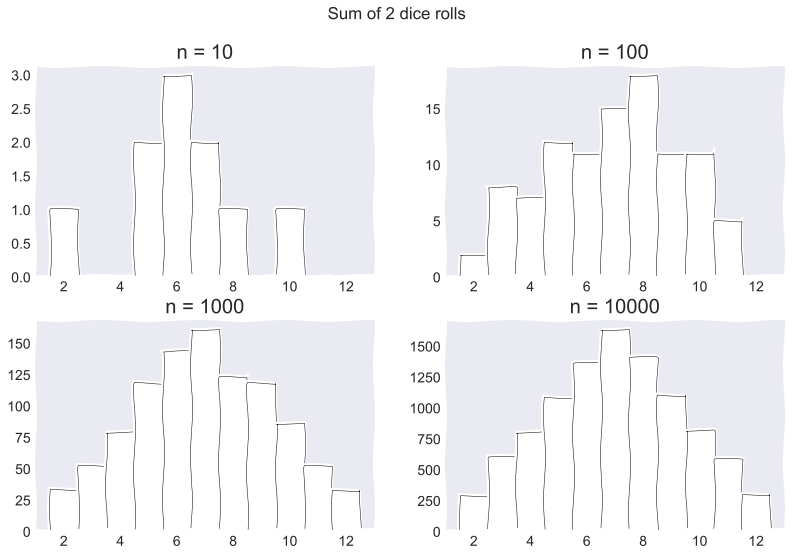

In [101]:
#plt.xkcd()

plt.figure(figsize=(12, 8))
for i in range(1, 5):
    n = 10 ** i
    x1 = [randint(1, 6) for _ in range(n)]
    x2 = [randint(1, 6) for _ in range(n)]

    total = [x + y for x, y in zip(x1, x2)]

    plt.subplot(2, 2, i)
    plt.hist(total, bins=range(2, 14), align='left', color='white', edgecolor='black')
    plt.title(f'n = {n}')

plt.suptitle('Sum of 2 dice rolls')
plt.show()

We can also create 2d histograms.

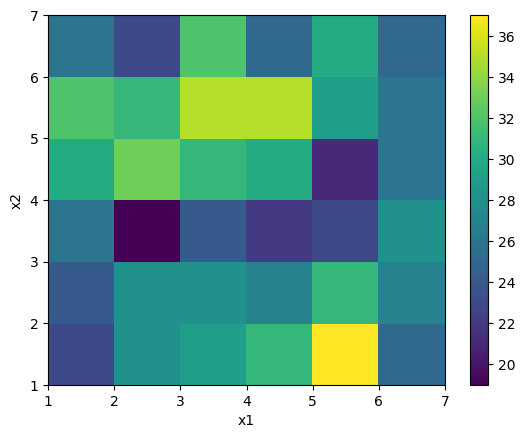

In [105]:
plt.rcdefaults() 

n = 1000
x1 = [randint(1, 6) for _ in range(n)]
x2 = [randint(1, 6) for _ in range(n)]

plt.hist2d(x=x1, y=x2, bins=range(1, 8), )
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

### Axis Scales

We can change the scales of the axes to be, for example, logarithmic.

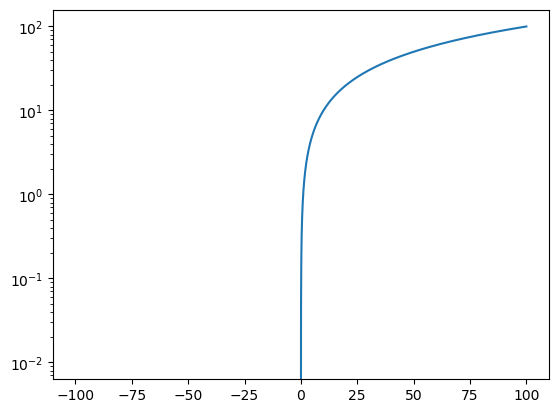

In [106]:
plt.rcdefaults() 

x = [n / 100 for n in range(-10000, 10000)]
y = list(x)

plt.plot(x, y)
plt.xscale('linear') # the default
plt.yscale('log')
plt.show()

Material from Corey Schaefer tutorials in Matplotlib (using hex color values)

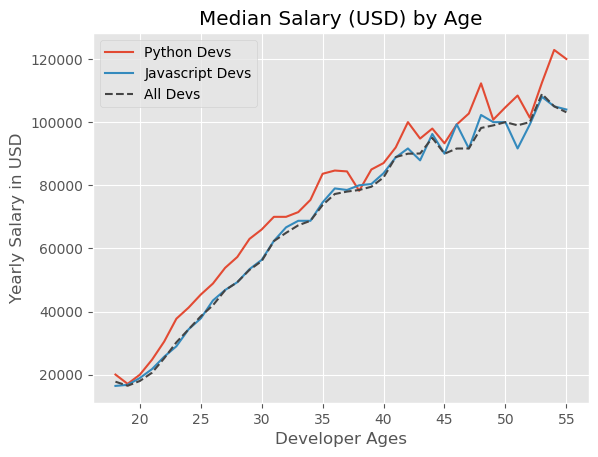

In [122]:
plt.rcdefaults() 
plt.style.use('ggplot')

# Median Python Developer Salaries by ages_x
# Ages 18 to 55
ages_x = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
          36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
py_dev_y = [20046, 17100, 20000, 24744, 30500, 37732, 41247, 45372, 48876, 53850, 57287, 63016, 65998, 70003, 70000, 71496, 75370, 83640, 84666,
            84392, 78254, 85000, 87038, 91991, 100000, 94796, 97962, 93302, 99240, 102736, 112285, 100771, 104708, 108423, 101407, 112542, 122870, 120000]
plt.plot(ages_x, py_dev_y, label="Python Devs")

# Median JavaScript Developer Salaries by ages_x  adad3b
js_dev_y = [16446, 16791, 18942, 21780, 25704, 29000, 34372, 37810, 43515, 46823, 49293, 53437, 56373, 62375, 66674, 68745, 68746, 74583, 79000,
            78508, 79996, 80403, 83820, 88833, 91660, 87892, 96243, 90000, 99313, 91660, 102264, 100000, 100000, 91660, 99240, 108000, 105000, 104000]
plt.plot(ages_x, js_dev_y, label="Javascript Devs")

# Median All Developer Salaries by Age
dev_y = [17784, 16500, 18012, 20628, 25206, 30252, 34368, 38496, 42000, 46752, 49320, 53200, 56000, 62316, 64928, 67317, 68748, 73752, 77232,
         78000, 78508, 79536, 82488, 88935, 90000, 90056, 95000, 90000, 91633, 91660, 98150, 98964, 100000, 98988, 100000, 108923, 105000, 103117]
plt.plot(ages_x, dev_y, color="#444444", linestyle="--", label="All Devs")
plt.xlabel("Developer Ages")
plt.ylabel("Yearly Salary in USD")
plt.title("Median Salary (USD) by Age")

plt.legend()
#plt.grid(True)
#plt.tight_layout()
plt.savefig("median_dev_salary")
plt.show()

Practice creating side-by-side bar chart and shifting bar alignment

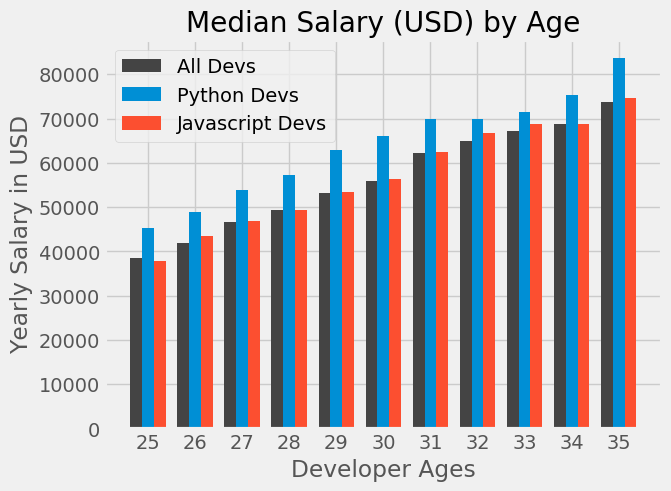

In [134]:
#print(plt.style.available)
plt.style.use("fivethirtyeight")

# Median Developer Salaries by Age
ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

x_indexes = np.arange(len(ages_x))
width = 0.25

dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
plt.bar(x_indexes - width, dev_y, width=width, color="#444444", linestyle="--", label="All Devs")

# Median Python Developer Salaries by ages_x
py_dev_y = py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]
plt.bar(x_indexes, py_dev_y, width=width, label="Python Devs")

# Median JavaScript Developer Salaries by ages_x  adad3b
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]

plt.bar(x_indexes + width, js_dev_y, width=width, label="Javascript Devs")
plt.xlabel("Developer Ages")
plt.ylabel("Yearly Salary in USD")
plt.xticks(ticks=x_indexes, labels=ages_x)
plt.title("Median Salary (USD) by Age")
plt.legend()
plt.show()

Practice loading in data using a CSV

In [ ]:
#print(plt.style.available)
plt.style.use("fivethirtyeight")


# plt.xlabel("Developer Ages")
# plt.ylabel("Yearly Salary in USD")
# plt.xticks(ticks=x_indexes, labels=ages_x)
# plt.title("Median Salary (USD) by Age")
# plt.legend()
# plt.show()